Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('Position_Salaries.csv')
# we only take second column i.e Level which corresponds to the Position
X = dataset.iloc[:, -2].values
y = dataset.iloc[:, -1].values

# need to convert X and y to 2D array since the feature scaling function expects a 2D array as input
X = X.reshape(-1,1)
y = y.reshape(-1,1)

# no need for feature-scaling for this model
# might need to add missing data, encoding based on dataset (but not required for this)

---

Training the Random Forest Regression model on the whole set

In [7]:
from sklearn.ensemble import RandomForestRegressor

# n_estimators tells us the no. of trees we want to choose
# we set random_state to 0 since we want to get the same result at the end
regressor = RandomForestRegressor(random_state=0, n_estimators=10)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

---

Predicting a new result

In [8]:
y_pred = regressor.predict([[6.5]])
print(y_pred)

[167000.]


---

Visualizing the Random Forest Regression results (high resolution)

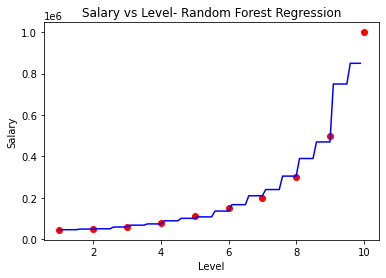

In [10]:
# cannot plot when we have more than one feature variable since the plot will not be 2D anymore

# X_grid will have the min to max of actual X values at an interval of 0.1 ie. 0, 0.1, 0.2.... 9.8, 9.9, 10
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(-1,1)

plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')

plt.title('Salary vs Level- Random Forest Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# more steps than Decision Tree since we have n trees which results in more splits